In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")


In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn import preprocessing


<h1>Ensembles</h1>

Ensembles develop around two main ideas. 

The first one the idea that combining weak learners we can get a strong learner. Around this idea there is a large corpus of theoretical work that gets implemented and refined through time.

The second main idea is more prosaic and revolves around the need to overcome overfitting, particularly in trees. This results in implementing combinations of the same learner in order to reduce variance and avoid overfitting while increasing the performance of the learner. 

These ideas crystalize in three different models of ensembles:
<blockquote>
<ul>
    <li><b>Bagging.</b> Building multiple models, typically the same type, from different subsamples of a dataset (normmally with repetition) and combining them with an aggregate such as the mean.</li>
    <li><b>Boosting.</b> The idea of boosting is to build the model incrementally where each iteration tries to fix the errors of the previous one.</li> 
    <li><b>Voting.</b> In this case we have multiple models, typically of different types, and a procedure to combine their predictions (normlly a simple statistic such as the mean).</li>
</ul>
</blockquote>

In order to be able to compare them with the previous one, we will use the same dataset, the Pima Indians, with a 10-fold cross-validation and accuracy as the performance metric.


<img src="Pima_indians_cowboy_1889.jpg">

In this exercise we will use one of the traditional Machine Learning dataset, the Pima Indians diabetes dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, <b>Outcome</b>. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<blockquote>
        <ul style="list-style-type:square;">
            <li>Pregnancies</li> 
            <li>Glucose</li>
            <li>BloodPressure</li>
            <li>SkinThickness</li>
            <li>Insulin</li>
            <li>BMI</li>
            <li>DiabetesPedigreeFunction (scores de likelihood of diabetes based on family history)</li>
            <li>Age</li>
            <li>Outcome</li>
        </ul>
</blockquote>

In [3]:
# Load the Pima indians dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="pima-indians-diabetes.data.csv"
names=["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "outcome"]
p_indians=pd.read_csv(filename, names=names)
p_indians.head()

# First we separate into input and output components
array=p_indians.values
X=array[:,0:8]
y=array[:,8]
np.set_printoptions(suppress=True)
X
pd.DataFrame(X).head()

# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


# Bagged Decision Trees

Bagging is the contraction of bootstraping + aggregation. The idea behind bagging is to reduce the variance of the weak learner by randomly sampling with repetigion and building a number of learners than later are being aggregated with voting if a classifier or with an statistic such as the mean if regression. 

In this case we will use the DecisionTreeClassifier (CART) with the <b>BaggingClassifier</b> class.

In [4]:
# Bagged Decision Trees              #lower variance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

#learner=DecisionTreeClassifier(class_weight="balanced", random_state=seed)
learner=DecisionTreeClassifier(random_state=seed)              #TIPICAL MODEL WITH BAGEN--> PRECISION TREES!

num_trees=100

model=BaggingClassifier(base_estimator=learner, n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Bagged Decision Trees - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')


res_w1["Res"]=results
res_w1["Type"]="Bagged DT"

resall=pd.concat([resall,res_w1], ignore_index=True)


Bagged Decision Trees - Accuracy 77.075% std 7.386790


# Random Forest

Random Forest is an extension of Bagged Decision Trees, aiming at reducing the correlation between the individual classifiers. 

The strategy chosen consists in considering a randomly selected number of features in each split instead of searching greedily the best. 

For Random Forest you have to use the <b>RandomForestClassifier</b> class.


In [5]:
# Random Forest              # only way to create diversion is data before
                             # but here we select group of 3 features!! 7 to 8 features*we select 3 out of them)
from sklearn.ensemble import RandomForestClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Random Forest - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Random Forest"

resall=pd.concat([resall,res_w1], ignore_index=True)

Random Forest - Accuracy 77.338% std 6.903630


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

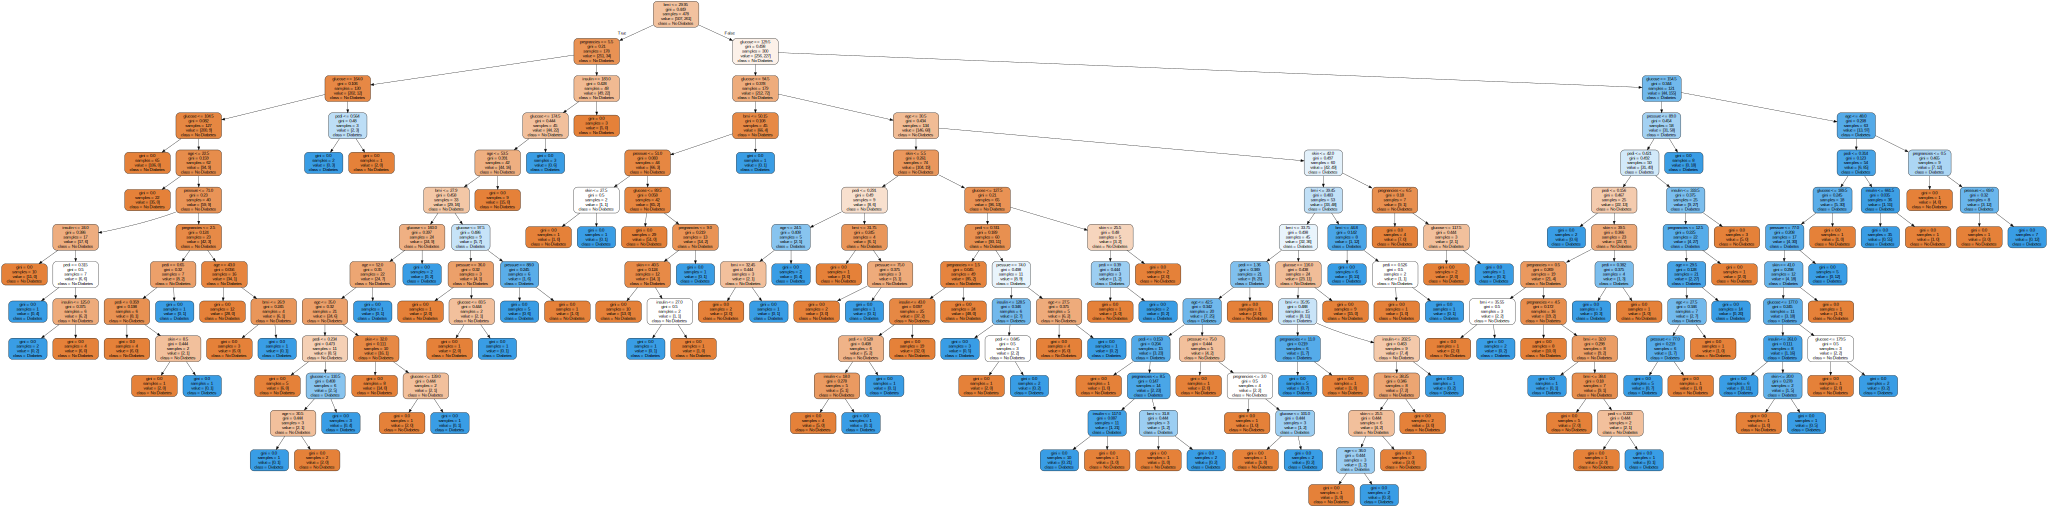

In [6]:
# visualizing a single tree in a random forest

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive

seed=7

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
model.fit(X,y)

estimator = model.estimators_[5]


graph=Source(tree.export_graphviz(estimator,
        out_file=None,
        feature_names=p_indians.columns[1:],
        class_names=['No Diabetes','Diabetes'],
        filled=True,
        rounded=True))
graph

#if you want to save it in a file
#  the file will open in preview and you can save it 
#  just uncomment

# graph.format = 'png'
# graph.render('dtree_render',view=True)



# Extra Trees

Extra Tress stands for Extremely Randomized Trees and it's a variation of Random Forest.

While similar to ordinary random forests in that they are an ensemble of individual trees, there are two main differences: first, each tree is trained using the whole learning sample (rather than a bootstrap sample), and second, the top-down splitting in the tree learner is randomized. Instead of computing the locally optimal cut-point for each feature under consideration (based on, e.g., information gain or the Gini impurity), a random cut-point is selected.

For Extra Tress you must use the <b>ExtraTreeClassifier</b> class.

In [7]:
# Extra Trees            #we train it with entire dataset

from sklearn.ensemble import ExtraTreesClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=300
num_features=5

model=ExtraTreesClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Extra Trees - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Extra Trees"

resall=pd.concat([resall,res_w1], ignore_index=True)

Extra Trees - Accuracy 77.592% std 7.081081


# AdaBoost

AdaBoost, short for Adaptative Boosting, was the first really successful boosting algorithm and in many ways opened the way to a new generation of boosting algorithms. 

It works by weighting instances of the dataset according to their difficulty to classify and using these weights to pay more or less attention to each instance when constructing the subsequent models.

You can use AdaBoost for classification with the <b>AdaBoostClassifier</b> class. 

In [8]:
# AdaBoost                #lowers variance

from sklearn.ensemble import AdaBoostClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=30                   #number of parameters = number of trees
                                    #with small amount of trees i can get nearly the best results
model=AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'AdaBoost - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="AdaBoost"

resall=pd.concat([resall,res_w1], ignore_index=True)

AdaBoost - Accuracy 76.046% std 5.443778


# Stochastic Gradient Boosting

Stochastic Gradient Boosting (also called Gradient Boosting Machines) is one of the most sophisticated ensemble techniques and one of the best in terms of improving the performance of ensembles. 

For Stochastic Gradient Boosting you have to use the <b>GradientBoostingClassifier</b> class.


In [9]:
# Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=30

model=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Stochastic Gradient Boosting - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="GradientBoosting"

resall=pd.concat([resall,res_w1], ignore_index=True)

Stochastic Gradient Boosting - Accuracy 77.203% std 6.500026


# Voting Ensemble

Voting is the simplest way to aggregate the predictions of multiple classifiers. 

The idea behind is pretty straighforward. First you create all models using your training dataset and when predicting you average (or vote in case of a classifier) the predictions of the submodels. 

More evolved variations can learn automatically how to best weight the predictions from the sub-models, although these versions are not currently available in scikit-learn

You can create a voting ensemble with the <b>VotingClassifier</b> class.

In [10]:
# Voting Ensemble

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

seed=7

kfold=KFold(n_splits=10, random_state=seed)

# create the models
estimators=[]
model1=LogisticRegression(solver="liblinear")
estimators.append(("logistic", model1))

model2=DecisionTreeClassifier(random_state=seed)
estimators.append(("cart", model2))

#model3=SVC(gamma="auto")
#estimators.append(("svm", model3))

num_trees=100
num_features=3

model4=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
estimators.append(("rfc", model4))

model=VotingClassifier(estimators)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Voting Ensemble (log,cart,rfc) - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Voting"

resall=pd.concat([resall,res_w1], ignore_index=True)

Voting Ensemble (log,cart,rfc) - Accuracy 77.208% std 5.699165


# Feature Importance

<Figure size 1080x648 with 0 Axes>

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

pregnancies      0.0778
glucose          0.2754
pressure         0.0873
skin             0.0617
insulin          0.0626
bmi              0.1721
pedi             0.1251
age              0.1379


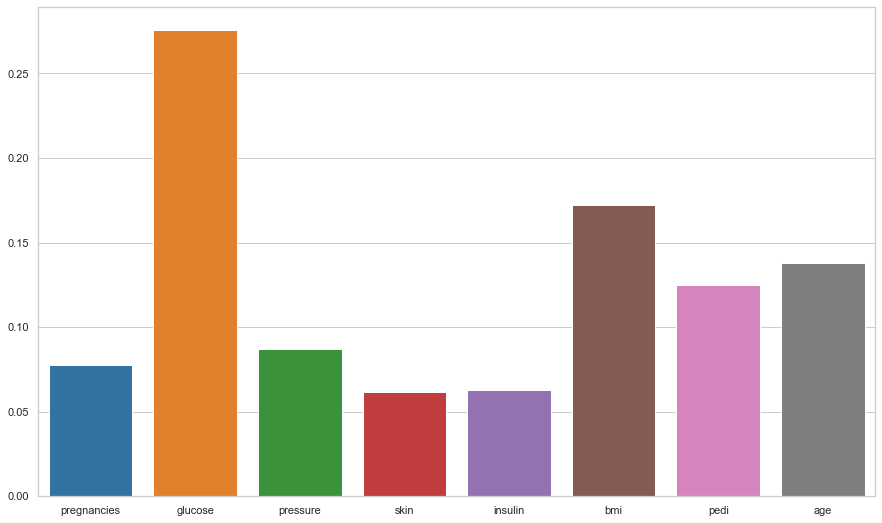

In [11]:
# Random Forest

plt.figure(figsize=(15,9))

from sklearn.ensemble import RandomForestClassifier

seed=7

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
model.fit(X,y)

for name, importance in zip(p_indians.columns, model.feature_importances_):
    print(f'{name:15s}  {importance:.4f}')

sns.barplot(x=p_indians.columns[:-1], y=model.feature_importances_)


# Algorithm Comparison

<Figure size 1080x648 with 0 Axes>

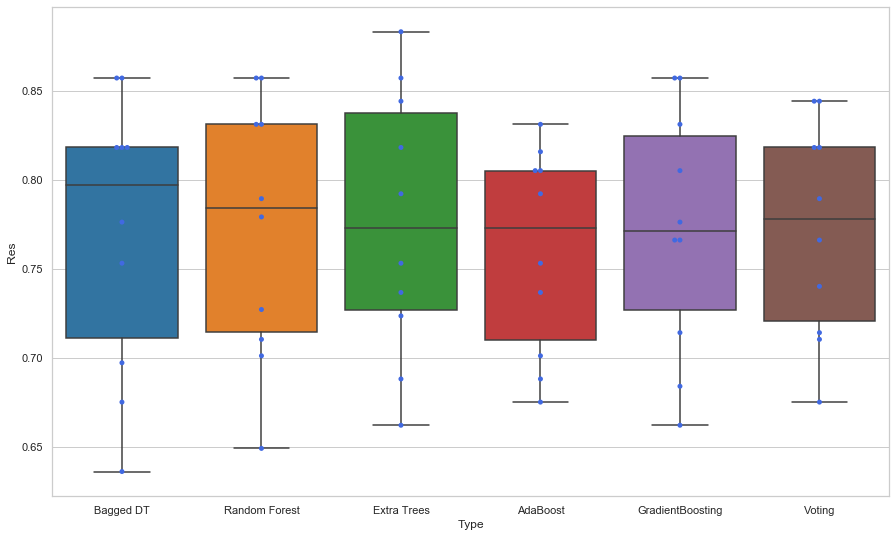

In [12]:
# Now let's compare them all 

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")

<b><font color="red" size=6>Mission 1</font>

a) Do the same with the Titanic dataset.<br><br>

<br><br>
</b>

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Gender                     887 non-null int64
dtypes: float64(2), int64(5)
memory usage: 48.6 KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0
5,0,3,27.0,0,0,8.4583,0
6,0,1,54.0,0,0,51.8625,0
7,0,3,2.0,3,1,21.0750,0
8,1,3,27.0,0,2,11.1333,1
9,1,2,14.0,1,0,30.0708,1
10,1,3,4.0,1,1,16.7000,1


Bagged Decision Trees - Accuracy 81.854% std 2.244547
Random Forest - Accuracy 81.854% std 3.439801


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

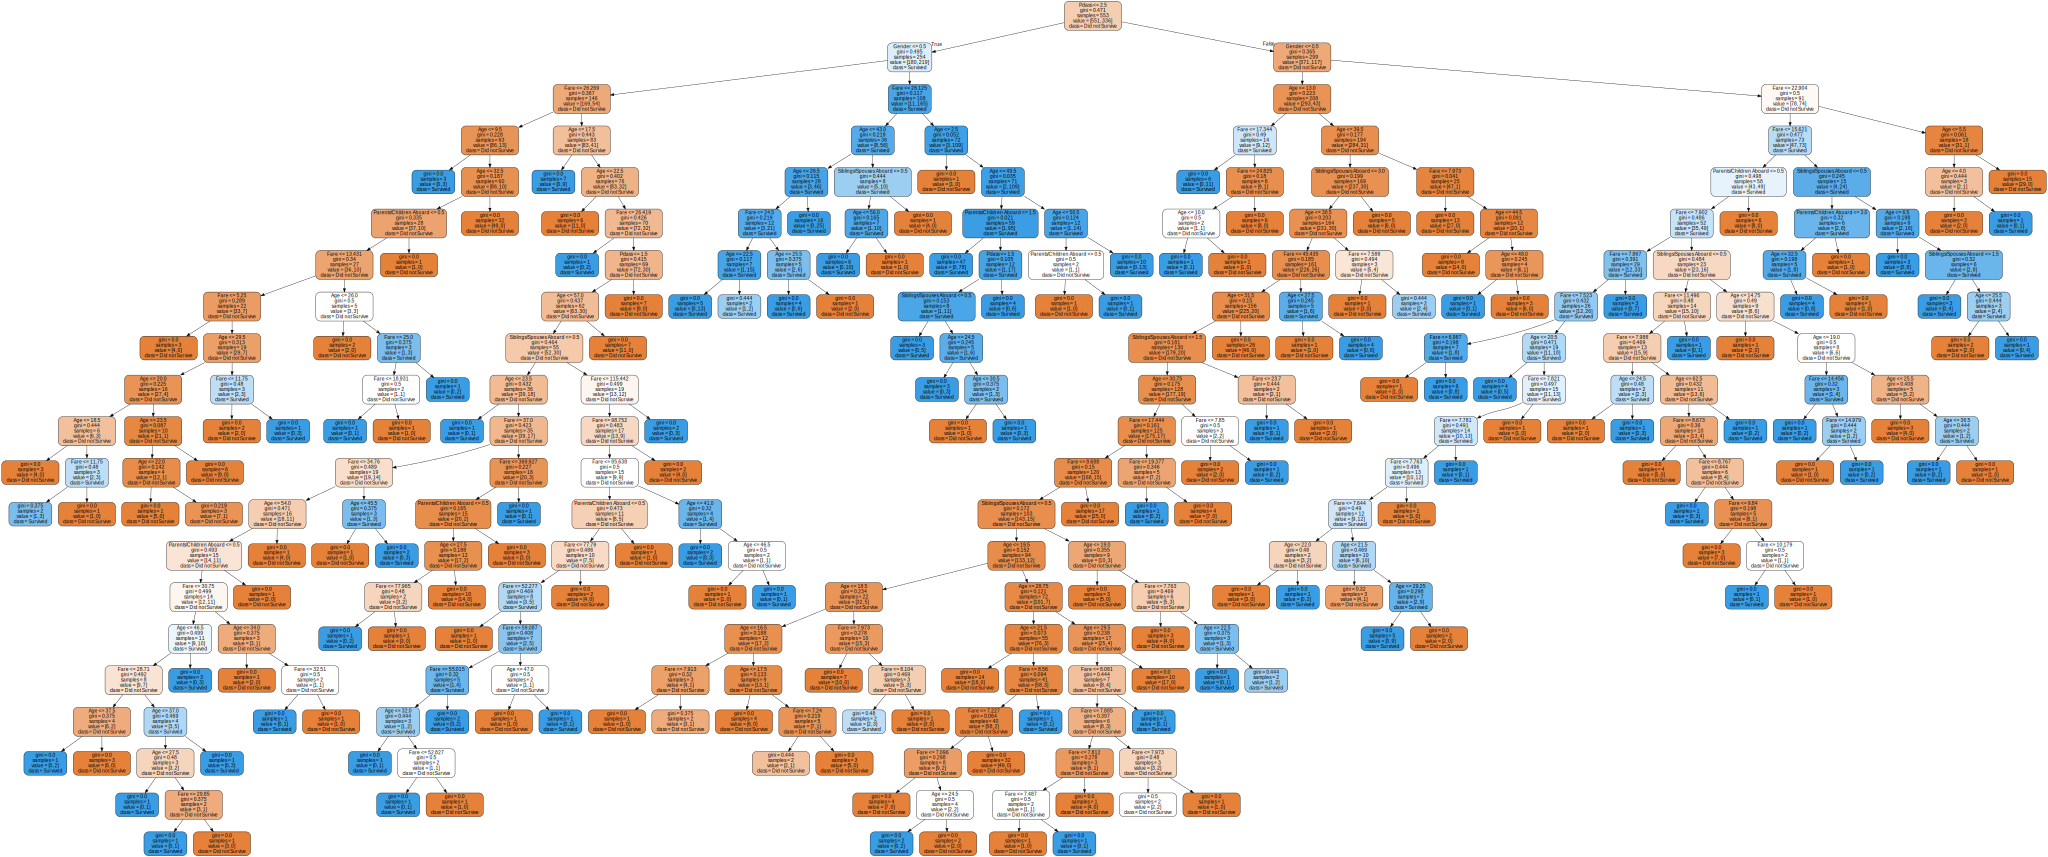

Extra Trees - Accuracy 79.713% std 3.799065
AdaBoost - Accuracy 80.506% std 3.170683
Stochastic Gradient Boosting - Accuracy 82.758% std 3.653793
Voting Ensemble (log,cart,rfc) - Accuracy 82.420% std 2.863265


<Figure size 1080x648 with 0 Axes>

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

Pclass           0.0925
Age              0.2759
Siblings/Spouses Aboard  0.0494
Parents/Children Aboard  0.0308
Fare             0.2744
Gender           0.2769


<Figure size 1080x648 with 0 Axes>

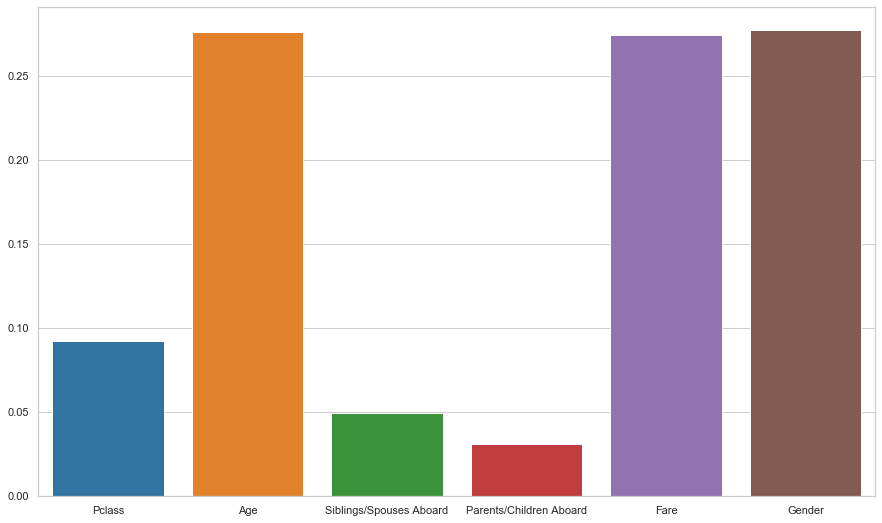

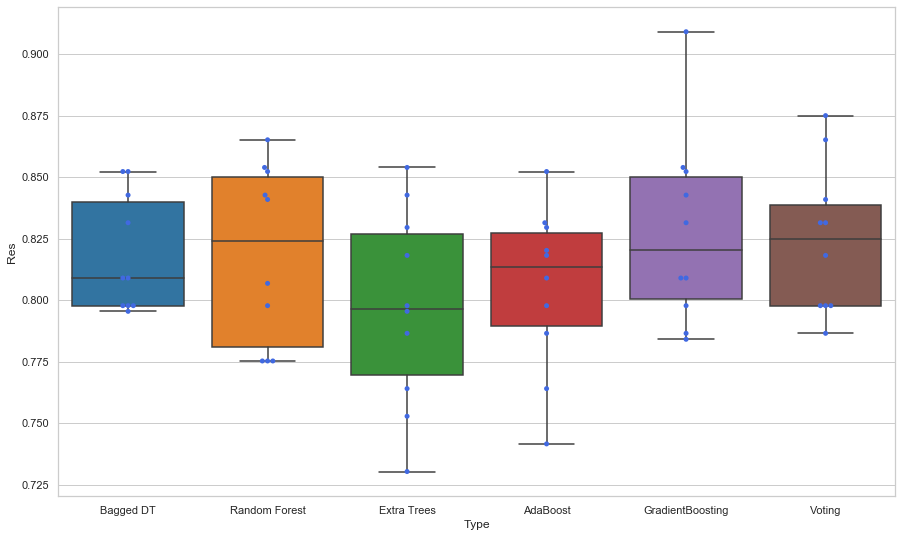

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


originaltid = pd.read_csv('titanic.csv')
titanic =originaltid.copy()
titanic['Gender'] = titanic['Sex'].apply(lambda x: (1 if x=='female' else 0))
titanic.head()
titanic.drop(['Name','Sex'],axis=1,inplace=True)
y = titanic["Survived"].values
# titanic.drop("Survived", axis = 1, inplace = True)

# titanic.dropna(inplace=True)

resall=pd.DataFrame()
res_w1=pd.DataFrame()

titanic.head()
X= titanic[["Pclass","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare","Gender"]].values
# X.head()


# titanic.head()
titanic.info()

# titanic.to_numpy()
# titanic.drop("Survived", axis = 1, inplace = True)
titanic[1:]

# Survived=titanic["Survived"]
# titanic.drop(labels=['Survived'],axis=1,inplace=True)

# titanic=pd.concat([titanic,Survived], ignore_index=True)
# titanic.head()

# titanic=titanic.iloc[:,1:]

# Bagged Decision Trees              #lower variance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

#learner=DecisionTreeClassifier(class_weight="balanced", random_state=seed)
learner=DecisionTreeClassifier(random_state=seed)              #TIPICAL MODEL WITH BAGEN--> PRECISION TREES!

num_trees=100

model=BaggingClassifier(base_estimator=learner, n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Bagged Decision Trees - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')


res_w1["Res"]=results
res_w1["Type"]="Bagged DT"

resall=pd.concat([resall,res_w1], ignore_index=True)


# Random Forest              # only way to create diversion is data before
                             # but here we select group of 3 features!! 7 to 8 features*we select 3 out of them)
from sklearn.ensemble import RandomForestClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Random Forest - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Random Forest"

resall=pd.concat([resall,res_w1], ignore_index=True)


# visualizing a single tree in a random forest

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive

seed=7

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
model.fit(X,y)

estimator = model.estimators_[5]


graph=Source(tree.export_graphviz(estimator,
        out_file=None,
        feature_names=titanic.columns[1:],
        class_names=['Did not Survive','Survived'],
        filled=True,
        rounded=True))
graph

#if you want to save it in a file
#  the file will open in preview and you can save it 
#  just uncomment

# graph.format = 'png'
# graph.render('dtree_render',view=True)


# Extra Trees            #we train it with entire dataset

from sklearn.ensemble import ExtraTreesClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=300
num_features=5

model=ExtraTreesClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Extra Trees - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Extra Trees"

resall=pd.concat([resall,res_w1], ignore_index=True)


# AdaBoost                #lowers variance

from sklearn.ensemble import AdaBoostClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=30                   #number of parameters = number of trees
                                    #with small amount of trees i can get nearly the best results
model=AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'AdaBoost - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="AdaBoost"

resall=pd.concat([resall,res_w1], ignore_index=True)


# Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=30

model=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Stochastic Gradient Boosting - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="GradientBoosting"

resall=pd.concat([resall,res_w1], ignore_index=True)


# Voting Ensemble

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

seed=7

kfold=KFold(n_splits=10, random_state=seed)

# create the models
estimators=[]
model1=LogisticRegression(solver="liblinear")
estimators.append(("logistic", model1))

model2=DecisionTreeClassifier(random_state=seed)
estimators.append(("cart", model2))

#model3=SVC(gamma="auto")
#estimators.append(("svm", model3))

num_trees=100
num_features=3

model4=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
estimators.append(("rfc", model4))

model=VotingClassifier(estimators)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Voting Ensemble (log,cart,rfc) - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Voting"

resall=pd.concat([resall,res_w1], ignore_index=True)


# Random Forest

plt.figure(figsize=(15,9))

from sklearn.ensemble import RandomForestClassifier

seed=7

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
model.fit(X,y)

for name, importance in zip(titanic.columns[1:], model.feature_importances_):
    print(f'{name:15s}  {importance:.4f}')

sns.barplot(x=titanic.columns[1:], y=model.feature_importances_)



# Now let's compare them all 

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")



